In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 시간 관리를 위한 라이브러리
import datetime

# 데이터 수집
from pandas_datareader import data
import requests
from bs4 import BeautifulSoup
import re
import time
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select

# 화면 청소
from IPython.display import clear_output

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 시계열 분석
from pmdarima.arima import auto_arima
from prophet import Prophet

# 형태소 분석도구
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
from soynlp.noun import LRNounExtractor
from soynlp.noun import NewsNounExtractor

from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변한하는 라이브러리
from sklearn.feature_extraction.text import TfidfTransformer


# 워드 클라우드
from collections import Counter
import pytagcloud
from IPython.display import Image

# 상관관계
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 추천
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# 파일 불러오기
combined_df = pd.read_csv('네이버리뷰_전처리.csv')

In [3]:
import json
import pandas as pd
from soynlp.tokenizer import LTokenizer

# 1. 감성사전 JSON 파일 불러오기
with open('data/SentiWord_info.json', 'r', encoding='utf-8') as f:
    senti_data = json.load(f)

# 2. 긍정/부정 단어만 추출하여 딕셔너리 생성
sentiment_dict = {}
for item in senti_data:
    word = item['word']
    polarity = item['polarity']

    if polarity == '매우긍정':
        score = 2
    elif polarity == '긍정':
        score = 1
    elif polarity == '부정':
        score = -1
    elif polarity == '매우부정':
        score = -2
    else:
        continue  # 중립이면 제외

    sentiment_dict[word] = score

print(f"✅ 감성 단어 수: {len(sentiment_dict)}")

# 3. 토크나이저 준비
tokenizer = LTokenizer(scores={word: abs(score) for word, score in sentiment_dict.items()})

# 4. 감성 점수 계산 함수
def score_sentiment(text):
    if pd.isna(text):
        return 0
    tokens = tokenizer.tokenize(str(text))
    return sum([sentiment_dict.get(token, 0) for token in tokens])

# 5. 감성 분석 적용
combined_df['감성점수'] = combined_df['리뷰'].apply(score_sentiment)
combined_df['감성라벨'] = combined_df['감성점수'].apply(
    lambda x: '긍정' if x > 0 else ('부정' if x < 0 else '중립')
)

# 6. 결과 확인
print(combined_df['감성라벨'].value_counts())
combined_df[['업소명', '리뷰', '감성점수', '감성라벨']].head()


✅ 감성 단어 수: 0
감성라벨
중립    13709
Name: count, dtype: int64


,업소명,리뷰,감성점수,감성라벨
0,차덕분,"친구가 찻집갈까? 했는데, 차는 딱히 땡기지 않았지만영종도는 처음이라 흔쾌히 따라온...",0,중립
1,차덕분,"오랜만에 차덕분에 왔습니다.차덕분은 여러가지 차와 음료, 커피, 아이스크림, 다과 ...",0,중립
2,차덕분,"인천 영종도에 위치한 티하우스 '차덕분'재작년부터 방문하고 싶었던 곳이었으며, 호텔...",0,중립
3,차덕분,남편이 어렸을 때부터 자주 다니던 곳이라고 해서 공휴일에 일찍 일어나서 왔어요 일찍...,0,중립
4,차덕분,리뷰는 처음 남기지만 여러번 재방문한 차덕분입니다 :)오늘의차(모리화차 냉차)와 오...,0,중립


In [4]:
with open('data/SentiWord_info.json', 'r', encoding='utf-8') as f:
    senti_data = json.load(f)

# 첫 3개 항목 확인
for i in range(3):
    print(senti_data[i])


{'word': '(-;', 'word_root': '(', 'polarity': '1'}
{'word': '(;_;)', 'word_root': '(;_;)', 'polarity': '-1'}
{'word': '(^^)', 'word_root': '(^^)', 'polarity': '1'}


In [5]:
import json

with open('data/SentiWord_info.json', 'r', encoding='utf-8') as f:
    senti_data = json.load(f)

# 문자열 형태의 감성 점수를 정수로 변환
sentiment_dict = {}

for item in senti_data:
    word = item['word']
    polarity_str = item['polarity']

    try:
        score = int(polarity_str)
        if score != 0:  # 중립은 제외
            sentiment_dict[word] = score
    except ValueError:
        continue  # 혹시 숫자가 아닌 값이 들어있는 경우 대비


In [6]:
from soynlp.tokenizer import LTokenizer

tokenizer = LTokenizer(scores={w: abs(s) for w, s in sentiment_dict.items()})

def score_sentiment(text):
    if pd.isna(text):
        return 0
    tokens = tokenizer.tokenize(str(text))
    return sum([sentiment_dict.get(token, 0) for token in tokens])

# 감성 점수 및 라벨
combined_df['감성점수'] = combined_df['리뷰'].apply(score_sentiment)
combined_df['감성라벨'] = combined_df['감성점수'].apply(
    lambda x: '긍정' if x > 0 else ('부정' if x < 0 else '중립')
)

# 결과 확인
print(combined_df['감성라벨'].value_counts())


감성라벨
긍정    8557
중립    4382
부정     770
Name: count, dtype: int64


In [7]:
from collections import Counter
from soynlp.tokenizer import LTokenizer

# 긍정 리뷰만 필터링
positive_reviews = combined_df[combined_df['감성라벨'] == '긍정']['리뷰'].dropna()

# 토크나이저 설정 (감성 점수는 안 써도 됨)
tokenizer = LTokenizer()

# 모든 긍정 리뷰에서 단어 토큰 추출
all_positive_tokens = []
for text in positive_reviews:
    tokens = tokenizer.tokenize(str(text))
    all_positive_tokens.extend(tokens)

# 단어 빈도 계산
token_freq = Counter(all_positive_tokens)

# 의미 없는 불용어(추가 가능)
stopwords = {'그리고', '그냥', '정말', '너무', '진짜', '많이', '또', '더', '잘', '같아요', '좋아요', 'ㅎㅎ','수','다','있어서','넘','것'}

# 불용어 제외하고 상위 20개 키워드 추출
top_keywords = [(word, freq) for word, freq in token_freq.items() if word not in stopwords]
top_keywords = sorted(top_keywords, key=lambda x: x[1], reverse=True)[:20]

# 출력
for i, (word, freq) in enumerate(top_keywords, 1):
    print(f"{i:2d}. {word}  ({freq}회)")


 1. 좋고  (761회)
 2. 좋은  (684회)
 3. 깨끗하고  (465회)
 4. 좀  (459회)
 5. 함께  (378회)
 6. 있는  (347회)
 7. 좋았어요  (297회)
 8. 꼭  (280회)
 9. 좋아요.  (272회)
10. 모두  (239회)
11. 많아서  (225회)
12. 사람이  (223회)
13. 뷰도  (220회)
14. 다시  (218회)
15. 하고  (217회)
16. 조금  (216회)
17. 시간  (211회)
18. 있고  (210회)
19. 모시고  (205회)
20. 뷰가  (200회)


In [8]:
from collections import Counter
from soynlp.tokenizer import LTokenizer

# 부정 리뷰 필터링
negative_reviews = combined_df[combined_df['감성라벨'] == '부정']['리뷰'].dropna()

# 토크나이저
tokenizer = LTokenizer()

# 전체 부정 리뷰 토큰화
all_negative_tokens = []
for text in negative_reviews:
    tokens = tokenizer.tokenize(str(text))
    all_negative_tokens.extend(tokens)

# 단어 빈도 계산
token_freq_neg = Counter(all_negative_tokens)

# 불용어 (긍정과 동일하게 설정)
stopwords = {'그리고', '그냥', '정말', '너무', '진짜', '많이', '또', '더', '잘', '같아요', '좋아요', 'ㅎㅎ'}

# 불용어 제거하고 상위 20개 키워드 추출
top_negative_keywords = [(word, freq) for word, freq in token_freq_neg.items() if word not in stopwords]
top_negative_keywords = sorted(top_negative_keywords, key=lambda x: x[1], reverse=True)[:20]

# 출력
print("\n📌 부정 리뷰 키워드 Top 20")
for i, (word, freq) in enumerate(top_negative_keywords, 1):
    print(f"{i:2d}. {word}  ({freq}회)")



📌 부정 리뷰 키워드 Top 20
 1. 좀  (102회)
 2. 다  (87회)
 3. 사람이  (63회)
 4. 수  (51회)
 5. 조금  (50회)
 6. 넘  (49회)
 7. 모시고  (46회)
 8. 없어서  (44회)
 9. 많아서  (43회)
10. 부모님  (40회)
11. 것  (39회)
12. 엄청  (38회)
13. 다시  (36회)
14. 있어서  (34회)
15. 있는  (33회)
16. 그  (31회)
17. 갔는데  (30회)
18. 가격이  (29회)
19. 사람들이  (29회)
20. 사람  (29회)


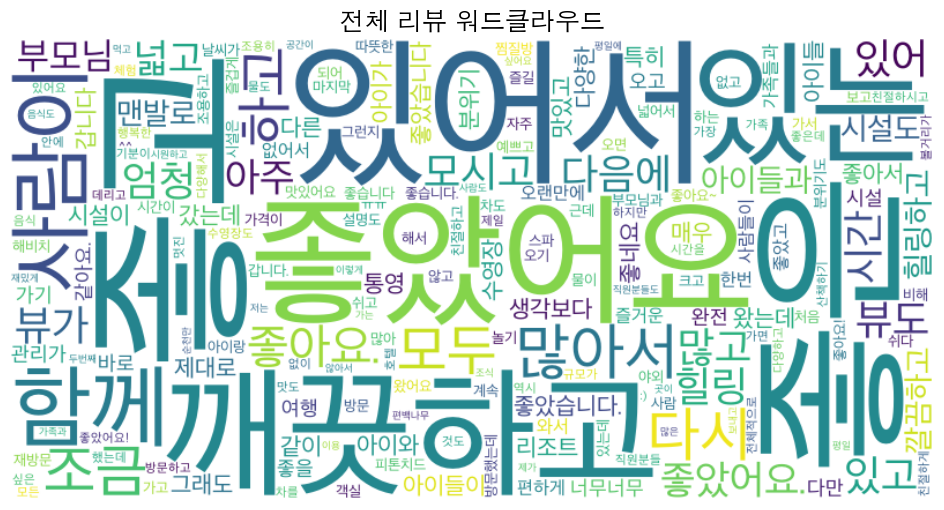

In [9]:
from soynlp.tokenizer import LTokenizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 전체 리뷰에서 토큰 추출
tokenizer = LTokenizer()
all_tokens = []

for text in combined_df['리뷰'].dropna():
    tokens = tokenizer.tokenize(str(text))
    all_tokens.extend(tokens)

# 불용어 제거 (원하는 단어는 추가 가능)
# stopwords = {'그리고', '그냥', '정말', '너무', '진짜', '많이', '또', '더', '잘', '같아요', '좋아요', 'ㅎㅎ'}
filtered_tokens = [token for token in all_tokens if token not in stopwords and len(token) > 1]

# 단어 빈도 계산
word_freq = Counter(filtered_tokens)

# 워드클라우드 생성
wc = WordCloud(
    font_path='/System/Library/Fonts/AppleSDGothicNeo.ttc',  # macOS 한글 폰트
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('전체 리뷰 워드클라우드', fontsize=18)
plt.show()


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# 리뷰 텍스트 전처리
texts = combined_df['리뷰'].dropna().astype(str).tolist()

# 2-gram 단어 묶음 생성
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=1000)
X = vectorizer.fit_transform(texts)

# 상위 n-gram 단어 추출
ngram_freq = X.sum(axis=0).A1
vocab = vectorizer.get_feature_names_out()
freq_df = pd.DataFrame({'ngram': vocab, 'freq': ngram_freq})
freq_df = freq_df.sort_values(by='freq', ascending=False)

# 상위 20개 출력
freq_df.head(20)


,ngram,freq
181,너무 좋아요,284
194,너무 좋았어요,275
409,부모님 모시고,174
173,너무 좋고,114
193,너무 좋았습니다,109
991,힐링하고 갑니다,109
439,뷰도 좋고,99
174,너무 좋네요,72
180,너무 좋아서,70
459,사람이 너무,68


In [11]:
import re
from collections import Counter

# 긍정 리뷰 중 "너무 좋"이 포함된 것만 필터링
pattern = re.compile(r'(\S{1,10})\s?너무\s?좋')  # 1~10자 정도의 앞 단어 추출
matches = []

for text in combined_df[combined_df['감성라벨'] == '긍정']['리뷰'].dropna():
    found = pattern.findall(text)
    matches.extend(found)

# 빈도 계산
before_good_freq = Counter(matches)
before_good_freq.most_common(50)


[('너무', 81),
 ('뷰가', 30),
 ('있어서', 30),
 ('왔는데', 29),
 ('뷰도', 23),
 ('아이들이', 23),
 ('아이가', 20),
 ('가기', 18),
 ('향이', 15),
 ('산책하기', 13),
 ('분위기도', 12),
 ('힐링하기', 12),
 ('뷰', 12),
 ('분위기', 12),
 ('놀기', 12),
 ('갔는데', 11),
 ('오기', 11),
 ('아이들도', 11),
 ('부모님이', 10),
 ('부모님도', 9),
 ('편백향이', 9),
 ('진짜', 8),
 ('있어', 8),
 ('방문했는데', 7),
 ('깨끗하고', 7),
 ('공기가', 7),
 ('분위기가', 6),
 ('정말', 6),
 ('아이도', 6),
 ('향도', 6),
 ('냄새가', 6),
 ('향기가', 6),
 ('전망이', 5),
 ('애들이', 5),
 ('시설', 5),
 ('시설이', 5),
 ('함께하기', 5),
 ('걷기', 5),
 ('피톤치드향이', 5),
 ('모두', 4),
 ('엄마도', 4),
 ('경치가', 4),
 ('쉬기', 4),
 ('친절하시고', 4),
 ('아기가', 4),
 ('정도로', 4),
 ('컨디션', 4),
 ('경치도', 4),
 ('많아서', 4),
 ('족욕', 4)]

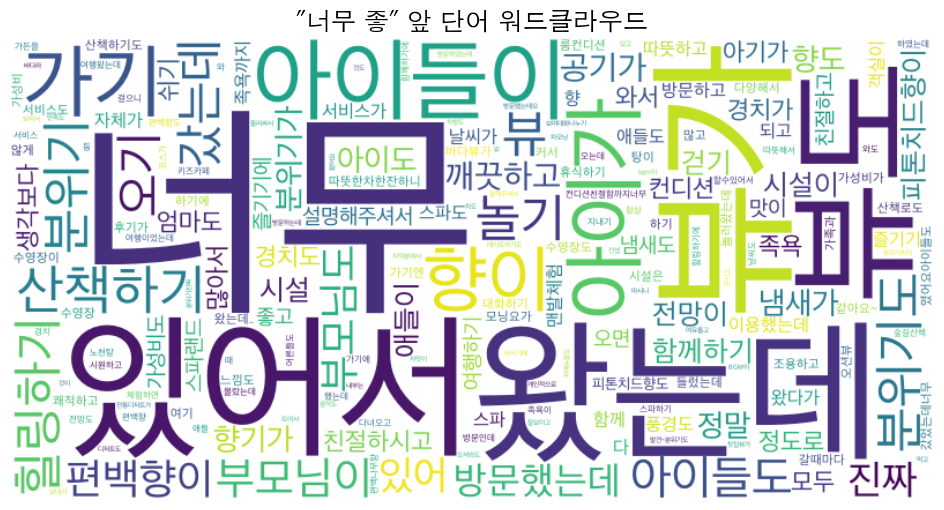

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# macOS 기준 한글 폰트 경로 (안 깨지게)
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'  # 또는 사용 중인 시스템의 한글 폰트 경로

# 워드클라우드 생성
wc = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(before_good_freq)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('"너무 좋" 앞 단어 워드클라우드', fontsize=18)
plt.show()


In [13]:
import re
from collections import Counter
import pandas as pd

# 1. 긍정 리뷰 중 "너무 좋" 앞 2단어 추출
pattern = re.compile(r'(\S+?\s\S+?)\s?너무\s?좋')  # 앞의 두 단어를 추출
matches = []

for text in combined_df[combined_df['감성라벨'] == '긍정']['리뷰'].dropna():
    found = pattern.findall(text)
    matches.extend(found)

# 2. 빈도수 계산
phrase_freq = Counter(matches)

# 3. 데이터프레임으로 정리 (Top 30개 예시)
df_top_phrases = pd.DataFrame(phrase_freq.most_common(30), columns=['표현', '빈도수'])
df_top_phrases


,표현,빈도수
0,수 있어서,11
1,모시고 왔는데,6
2,편백나무 향이,5
3,수 있어,4
4,같이 왔는데,4
5,모시고 갔는데,3
6,함께 왔는데,3
7,깨끗한 객실이,3
8,피톤치드 향이,3
9,모시고 오기,3


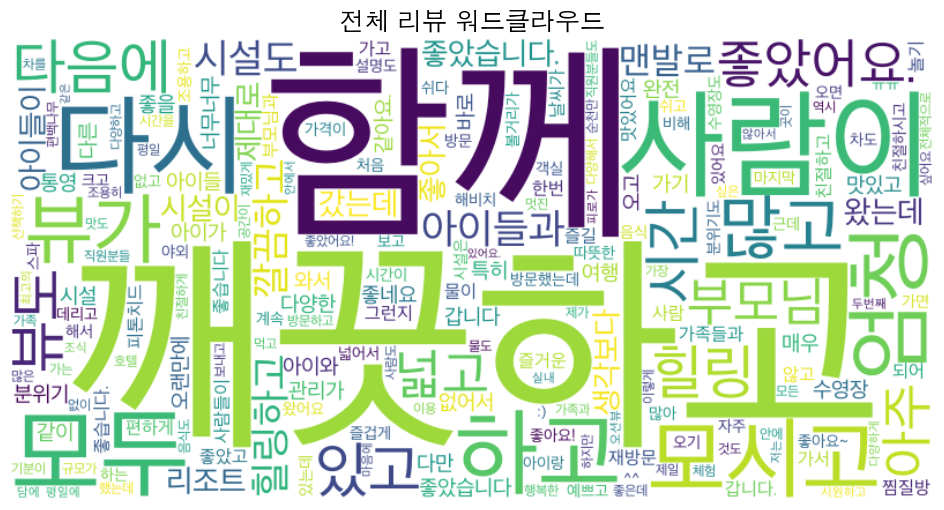

In [14]:
from soynlp.tokenizer import LTokenizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 전체 리뷰에서 토큰 추출
tokenizer = LTokenizer()
all_tokens = []

for text in combined_df['리뷰'].dropna():
    tokens = tokenizer.tokenize(str(text))
    all_tokens.extend(tokens)

# 불용어 제거 (원하는 단어는 추가 가능)
stopwords = {
    '그리고', '그냥', '정말', '너무', '진짜', '많이', '또', '더', '잘', '같아요',
    '좋아요', 'ㅎㅎ', '있어서', '좋고','좋았어요', '좋은', '좋아요', '있는', '많아서','조금', '좋아요.', '그래도', '있어', '좋았어요'  # ← 문자열이 아니라 집합으로 수정
}

filtered_tokens = [token for token in all_tokens if token not in stopwords and len(token) > 1]

# 단어 빈도 계산
word_freq = Counter(filtered_tokens)

# 워드클라우드 생성
wc = WordCloud(
    font_path='/System/Library/Fonts/AppleSDGothicNeo.ttc',  # macOS 한글 폰트
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('전체 리뷰 워드클라우드', fontsize=18)
plt.show()


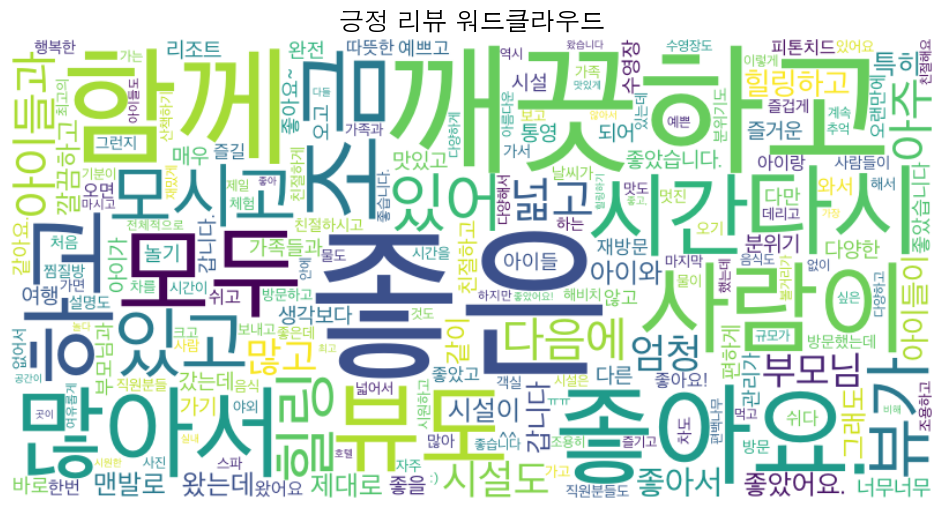

In [15]:
from soynlp.tokenizer import LTokenizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 긍정 리뷰 필터링
positive_reviews = combined_df[combined_df['감성라벨'] == '긍정']['리뷰'].dropna()

# 2. 토크나이저 설정
tokenizer = LTokenizer()
all_positive_tokens = []

# 3. 전체 긍정 리뷰에서 토큰 추출
for text in positive_reviews:
    tokens = tokenizer.tokenize(str(text))
    all_positive_tokens.extend(tokens)

# 4. 불용어 정의 및 제거
stopwords = {
    '그리고', '그냥', '정말', '너무', '진짜', '많이', '또', '더', '잘',
    '같아요', '좋아요', 'ㅎㅎ', '있어서', '좋고', '너무', '좋았어요', '좋네요',
    '정도', '그런', '이런', '있는', '에서', '그게', '근데', '했다', '되게', '다녀왔어요'
}
filtered_tokens = [token for token in all_positive_tokens if token not in stopwords and len(token) > 1]

# 5. 단어 빈도 계산
word_freq = Counter(filtered_tokens)

# 6. 워드클라우드 생성
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'  # macOS 기본 한글 폰트
wc = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(word_freq)

# 7. 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('긍정 리뷰 워드클라우드', fontsize=18)
plt.show()


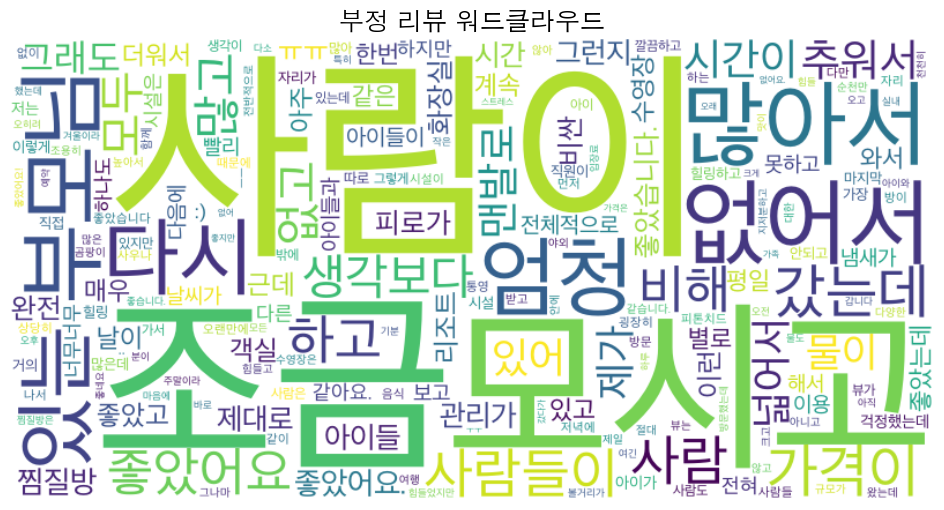

In [16]:
from soynlp.tokenizer import LTokenizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 부정 리뷰 필터링
negative_reviews = combined_df[combined_df['감성라벨'] == '부정']['리뷰'].dropna()

# 2. 토크나이저 설정
tokenizer = LTokenizer()
all_negative_tokens = []

# 3. 전체 부정 리뷰에서 토큰 추출
for text in negative_reviews:
    tokens = tokenizer.tokenize(str(text))
    all_negative_tokens.extend(tokens)

# 4. 불용어 정의 및 제거
stopwords = {
    '그리고', '그냥', '정말', '너무', '진짜', '많이', '또', '더', '잘',
    '같아요', '좋아요', 'ㅎㅎ', '있어서', '좋고'
}
filtered_tokens = [token for token in all_negative_tokens if token not in stopwords and len(token) > 1]

# 5. 단어 빈도 계산
word_freq = Counter(filtered_tokens)

# 6. 워드클라우드 생성
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'  # macOS 한글 폰트
wc = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(word_freq)

# 7. 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('부정 리뷰 워드클라우드', fontsize=18)
plt.show()


In [28]:
from soynlp.tokenizer import LTokenizer
from collections import Counter
import pandas as pd

# 1. 전체 리뷰 텍스트 수집
all_reviews = combined_df['리뷰'].dropna()

# 2. soynlp LTokenizer로 토큰화
tokenizer = LTokenizer()
all_tokens = []

for text in all_reviews:
    tokens = tokenizer.tokenize(str(text))
    all_tokens.extend(tokens)

# 3. 불용어 제거
stopwords = {
    '그리고', '그냥', '정말', '너무', '진짜', '많이', '또', '더', '잘','모두', '있는' ,'조금'
    '같아요', '좋아요', 'ㅎㅎ', '있어서', '좋고', '정도', '이런', '그런',
    '했어요', '있습니다', '있었어요', '좋았어요', '좋은', '좋아요.', '하고'
}
filtered_tokens = [token for token in all_tokens if token not in stopwords and len(token) > 1]

# 4. 단어 빈도수 계산
word_freq = Counter(filtered_tokens)

# 5. Top N개 추출 (예: 50개)
top_n = 50
df_top_words = pd.DataFrame(word_freq.most_common(top_n), columns=['단어', '빈도수'])


df_top_words 

,단어,빈도수
0,깨끗하고,480
1,함께,398
2,사람이,360
3,많아서,336
4,다시,308
5,조금,306
6,모시고,268
7,엄청,265
8,뷰가,261
9,많고,258
